In [57]:
# Importamos las librerias que vamos a utiliizar para este punto 

import pandas as pd
import matplotlib.pyplot as plt 
import os
import requests
import urllib.parse
import matplotlib.dates as mdates

In [58]:
### Funcion para llamar a la api de Series de Tiempo de la Republica Argentina
def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))

In [74]:
###Creamos los dataframes con las series de faena de cabezas de vacunas y faena de cabezas porcinas 
df_trigo = pd.read_csv(get_api_call(["34.1_THTRI_0_P_15"], format= "csv", collapse = "year"))
df_soja = pd.read_csv(get_api_call(["34.1_SHSOJ_0_P_14"], format= "csv", collapse = "year"))



In [80]:
df_trigo


,indice_tiempo,trigo_hectareas
0,1979-01-01,5000000.00
1,1980-01-01,6196000.00
2,1981-01-01,6566000.00
3,1982-01-01,7410000.00
4,1983-01-01,7200000.00
5,1984-01-01,6000000.00
6,1985-01-01,5700000.00
7,1986-01-01,5000000.00
8,1987-01-01,4850000.00
9,1988-01-01,4750000.00


In [82]:
### Juntamos las dos bases de datos en una sola. Ambas son del mismo periodo y con la misma frecuencia
df = pd.merge(df_soja, df_trigo, on = "indice_tiempo", how = "inner")
print(df)
###Armamos la tabla de estadisticas descriptivas
df.describe()

   indice_tiempo  soja_hectareas  trigo_hectareas
0     1979-01-01      2100000.00       5000000.00
1     1980-01-01      1925000.00       6196000.00
2     1981-01-01      2040000.00       6566000.00
3     1982-01-01      2362000.00       7410000.00
4     1983-01-01      2920000.00       7200000.00
5     1984-01-01      3300000.00       6000000.00
6     1985-01-01      3340000.00       5700000.00
7     1986-01-01      3700000.00       5000000.00
8     1987-01-01      4413000.00       4850000.00
9     1988-01-01      4670000.00       4750000.00
10    1989-01-01      5100000.00       5500000.00
11    1990-01-01      4966600.00       6178400.00
12    1991-01-01      5004000.00       4750850.00
13    1992-01-01      5319660.00       4547700.00
14    1993-01-01      5817490.00       4910000.00
15    1994-01-01      6011240.00       5308000.00
16    1995-01-01      6002155.00       5087800.00
17    1996-01-01      6669500.00       7366850.00
18    1997-01-01      7176250.00       5918665.00


,soja_hectareas,trigo_hectareas
count,46.00,46.00
mean,11278732.72,5658640.98
std,6456155.25,1001537.80
min,1925000.00,3160000.00
25%,5028000.00,4932500.00
50%,12123000.00,5911985.00
75%,16975000.00,6300000.00
max,20479000.00,7410000.00


float64


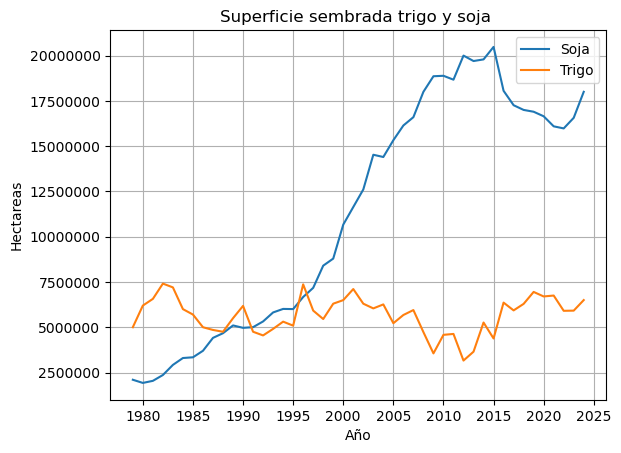

In [97]:


print(y1.dtypes)
x1 = pd.to_datetime(df["indice_tiempo"])
y1 = df["soja_hectareas"]
y2 = df["trigo_hectareas"]

plt.plot(x1, y1, label="Soja") # serie 1
plt.plot(x1, y2, label="Trigo")# serie 2


# Agrega etiquetas y título para mayor claridad
plt.ticklabel_format(style='plain', axis='y')
plt.title('Superficie sembrada trigo y soja ')
plt.legend()
plt.xlabel('Año')
plt.ylabel('Hectareas')
plt.grid(True)

# Muestra el gráfico
plt.show()

In [92]:
ymin=df['trigo_hectareas'].min()
ymin

3160000.0